<a href="https://colab.research.google.com/github/seismomat/IBEM/blob/Lili/IBEM_General.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Programa general:

In [2]:
import math
import scipy.special as scis
import numpy as np
from numpy import linalg as la
from matplotlib import pyplot as plt

In [12]:
#Geometría del problema
L=16000 #m

#Parḿetros del problema
T=2 #s
f0=1/T
dt=0.05
N=64
fmax=1/(2*dt)
df=1/(N*dt)

f = np.arange(df, fmax, df)

w = 2*np.pi*f

beta=2500
rho=2500

lambd = beta/f
k = w / beta

f0,fmax,df

NP=16

dx=lambd/NP

Fuente=np.array([1,-1])



10.0

In [4]:
#FUNCION PARA CREAR LOS SEGMENTOS PARA CADA LONGITUD DE ONDA:
def segmentos(L,dx):
  ns=L/dx

  segmento=np.zeros((int(ns)+1,2))
  segmento[:,0]=np.linspace(0,2,int(ns)+1)

  #Puntos medios:
  dxp=segmento[1,0]-segmento[0,0]

  xp=np.zeros((int(ns),2))
  xp[:,0]=segmento[:-1,0]+dxp/2
  return segmento, xp, ns

In [5]:
#FUNCIÓN DE VECTORES NORMALES:
def normales(segmento):
  #Vectores normales:
  AB=segmento[1:]-segmento[:-1] #Diferencia
  nor=AB[:,0] #Para obtener unitario
  normal=AB*0 #Auxiliar
  normal[:,0]=-AB[:,1]/nor
  normal[:,1]=AB[:,0]/nor
  #print(normal)
  return normal

In [6]:
'''
segmento, xp, ns=segmentos(L,dx[0])
normal=normales(segmento)
plt.plot(segmento[:,0],segmento[:,1],marker = '|')
plt.plot(xp[0:int(ns),0],xp[0:int(ns),1],'o')
plt.plot(Fuente[0],Fuente[1],marker = '*')

plt.xlabel('Distancia x')

plt.show()

print(normal)
'''

"\nsegmento, xp, ns=segmentos(L,dx[0])\nnormal=normales(segmento)\nplt.plot(segmento[:,0],segmento[:,1],marker = '|')\nplt.plot(xp[0:int(ns),0],xp[0:int(ns),1],'o')\nplt.plot(Fuente[0],Fuente[1],marker = '*')\n\nplt.xlabel('Distancia x')\n\nplt.show()\n\nprint(normal)\n"

In [7]:
#Función T22:
def T22(k,x,xi,normal):
    r= la.norm(x-xi)
    D = k*r * scis.hankel2(1,k*r)
    g_n=(x[0]-xi[0])/r * normal[0] + (x[1]-xi[1])/r * normal[1]
    return 1j/(4*r) * D * g_n

#Integración Gaussiana de T22
def Int_T22(n,l,k,segmento,xp,normal):
    #Para 5 puntos:
    nodos = [-0.906179845938664, -0.538469310105683,0, 0.538469310105683, 0.906179845938664]
    pesos = [0.236926885056189, 0.478628670499366, 0.568888888888889, 0.478628670499366, 0.236926885056189]

    #Para x
    b=segmento[l,0]
    a=segmento[l+1,0]
    xix_nodo = []  # Crear una lista vacía para almacenar los resultados
    for nodo in nodos:
      resultado = (b - a) / 2 * nodo + (a + b) / 2  # Calcula el resultado para cada valo
      xix_nodo.append(resultado)

    #Para z
    b=segmento[l,1]
    a=segmento[l+1,1]
    xiz_nodo = []
    for nodo in nodos:
      resultado = (b - a) / 2 * nodo + (a + b) / 2  # Calcula el resultado para cada valor
      xiz_nodo.append(resultado)

    Xi_nodo = []  # Crear una lista vacía para almacenar las listas
    for i in range(len(nodos)):
      sublista = [xix_nodo[i], xiz_nodo[i]]  # Crea la sublista
      Xi_nodo.append(sublista)  # Agrega la sublista a la lista

    Xi_nodo = np.array(Xi_nodo)

    L=la.norm(segmento[l]-segmento[n])
    Int=0.0
    for i in range(len(nodos)):
        Int += L/2 * pesos[i]*T22(k,xp[n],Xi_nodo[i],normal[n])
    return Int

In [13]:
#Construcción de matriz de tracciones para cada frecuencia:
MGeneral=[]

for i in range(len(f)):

  segmento, xp, ns=segmentos(L,dx[i])
  normal=normales(segmento)

  M22=np.zeros([int(ns),int(ns)])
  M22 = M22 + 0j*M22
  for n in range(int(ns)):
      for l in range(int(ns)):
          if n==l:
              M22[n,l]=0.5+0j
          else:
              M22[n,l]=Int_T22(n,l,k[i],segmento,xp,normal)
  MGeneral.append(M22)
  print('Frecuencia: %f'%f[i])
#print(M22)

Frecuencia: 0.312500
Frecuencia: 0.625000
Frecuencia: 0.937500
Frecuencia: 1.250000
Frecuencia: 1.562500
Frecuencia: 1.875000
Frecuencia: 2.187500
Frecuencia: 2.500000
Frecuencia: 2.812500
Frecuencia: 3.125000
Frecuencia: 3.437500
Frecuencia: 3.750000
Frecuencia: 4.062500
Frecuencia: 4.375000
Frecuencia: 4.687500
Frecuencia: 5.000000
Frecuencia: 5.312500
Frecuencia: 5.625000
Frecuencia: 5.937500
Frecuencia: 6.250000
Frecuencia: 6.562500
Frecuencia: 6.875000
Frecuencia: 7.187500
Frecuencia: 7.500000
Frecuencia: 7.812500
Frecuencia: 8.125000
Frecuencia: 8.437500
Frecuencia: 8.750000
Frecuencia: 9.062500
Frecuencia: 9.375000
Frecuencia: 9.687500


In [16]:
#Fuente para cada frecuencia

TG=[]
for i in range(len(f)):
  segmento, xp, ns=segmentos(L,dx[i])
  normal=normales(segmento)
  t2=np.zeros([int(ns),1])
  t2 = t2 + 0j*t2
  for l in range(int(ns)):
      t2[l]=-T22(k[i], xp[l], Fuente, normal[l])
  TG.append(t2)
  print('Frecuencia %d: %f'%(i+1,f[i]))

Frecuencia 1: 0.312500
Frecuencia 2: 0.625000
Frecuencia 3: 0.937500
Frecuencia 4: 1.250000
Frecuencia 5: 1.562500
Frecuencia 6: 1.875000
Frecuencia 7: 2.187500
Frecuencia 8: 2.500000
Frecuencia 9: 2.812500
Frecuencia 10: 3.125000
Frecuencia 11: 3.437500
Frecuencia 12: 3.750000
Frecuencia 13: 4.062500
Frecuencia 14: 4.375000
Frecuencia 15: 4.687500
Frecuencia 16: 5.000000
Frecuencia 17: 5.312500
Frecuencia 18: 5.625000
Frecuencia 19: 5.937500
Frecuencia 20: 6.250000
Frecuencia 21: 6.562500
Frecuencia 22: 6.875000
Frecuencia 23: 7.187500
Frecuencia 24: 7.500000
Frecuencia 25: 7.812500
Frecuencia 26: 8.125000
Frecuencia 27: 8.437500
Frecuencia 28: 8.750000
Frecuencia 29: 9.062500
Frecuencia 30: 9.375000
Frecuencia 31: 9.687500


In [26]:
len(TG)

31

In [27]:
#Resolviendo el sistema para cada frecuencia
solucionG=[]
for i in range(len(f)):
  solucion = np.linalg.solve(MGeneral[i],TG[i])
  #print(solucion)
  solucionG.append(solucion)
  print('Frecuencia %d: %f'%(i+1,f[i]))

Frecuencia 1: 0.312500
Frecuencia 2: 0.625000
Frecuencia 3: 0.937500
Frecuencia 4: 1.250000
Frecuencia 5: 1.562500
Frecuencia 6: 1.875000
Frecuencia 7: 2.187500
Frecuencia 8: 2.500000
Frecuencia 9: 2.812500
Frecuencia 10: 3.125000
Frecuencia 11: 3.437500
Frecuencia 12: 3.750000
Frecuencia 13: 4.062500
Frecuencia 14: 4.375000
Frecuencia 15: 4.687500
Frecuencia 16: 5.000000
Frecuencia 17: 5.312500
Frecuencia 18: 5.625000
Frecuencia 19: 5.937500
Frecuencia 20: 6.250000
Frecuencia 21: 6.562500
Frecuencia 22: 6.875000
Frecuencia 23: 7.187500
Frecuencia 24: 7.500000
Frecuencia 25: 7.812500
Frecuencia 26: 8.125000
Frecuencia 27: 8.437500
Frecuencia 28: 8.750000
Frecuencia 29: 9.062500
Frecuencia 30: 9.375000
Frecuencia 31: 9.687500


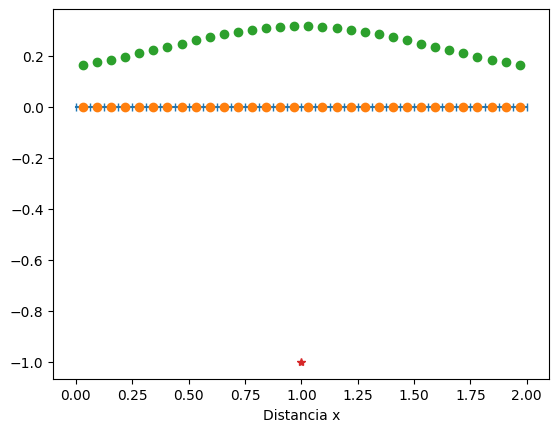

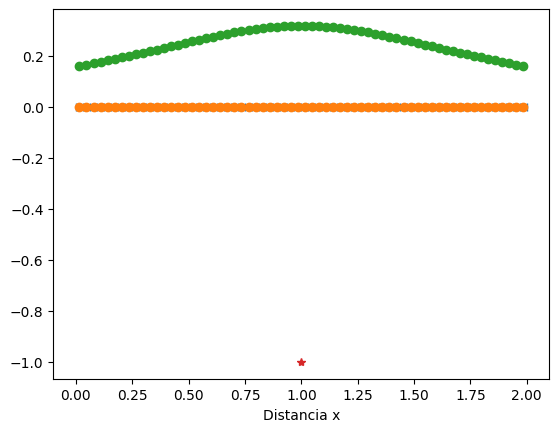

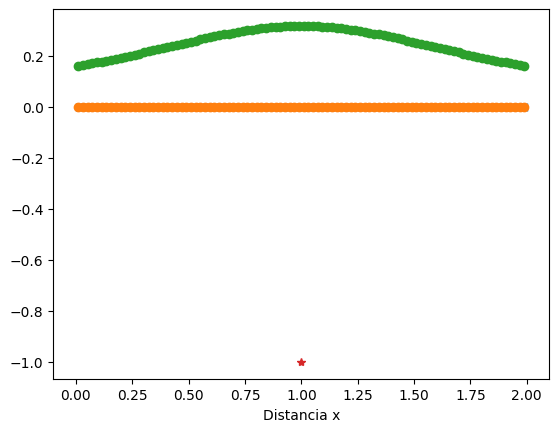

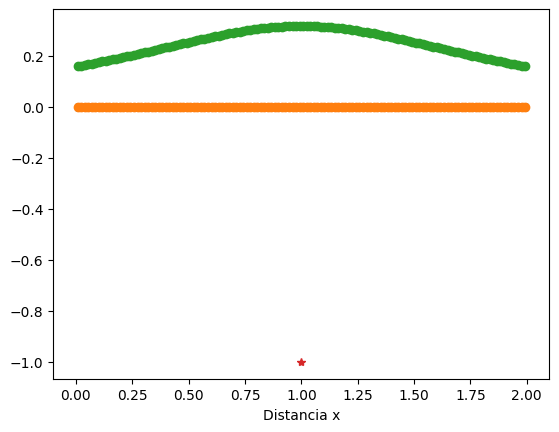

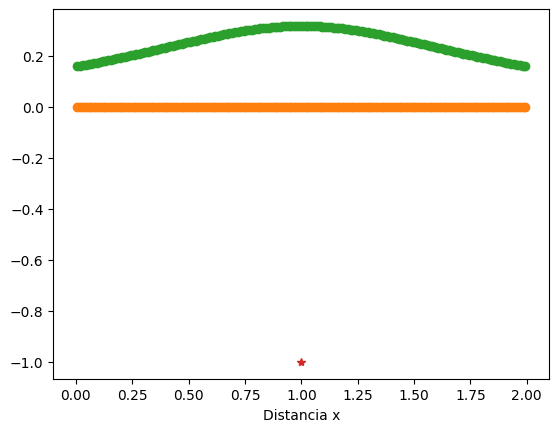

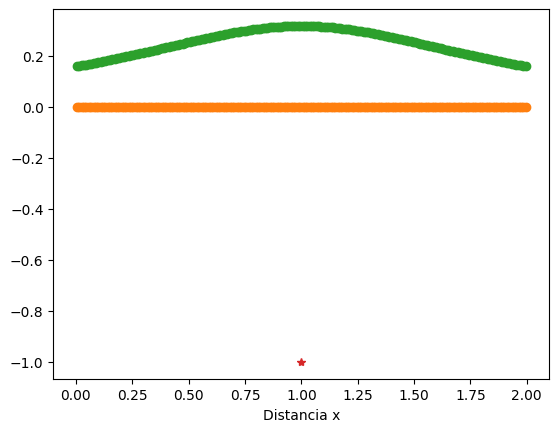

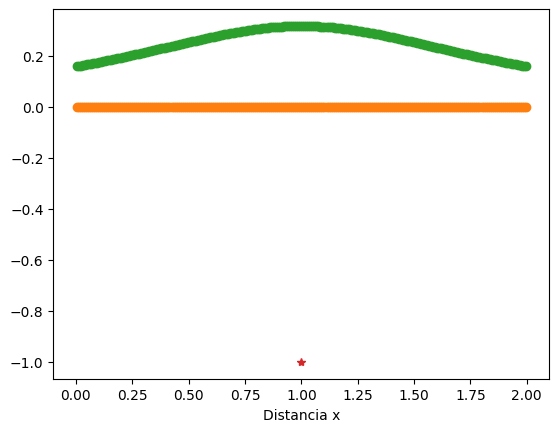

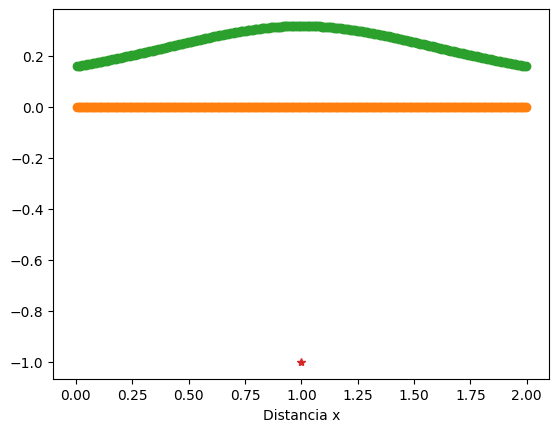

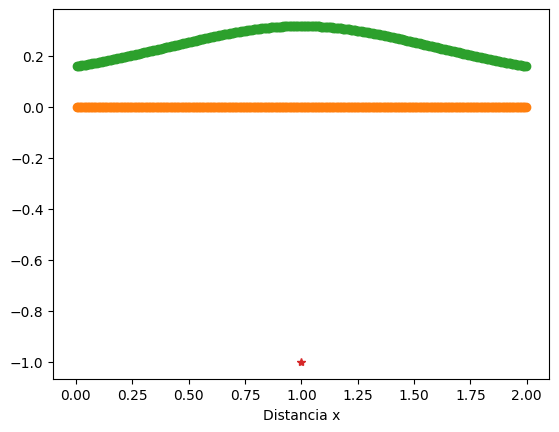

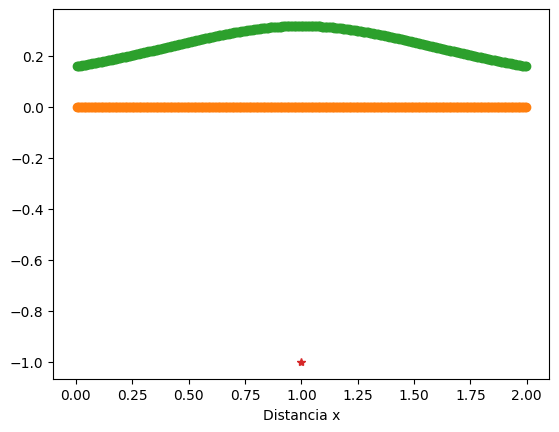

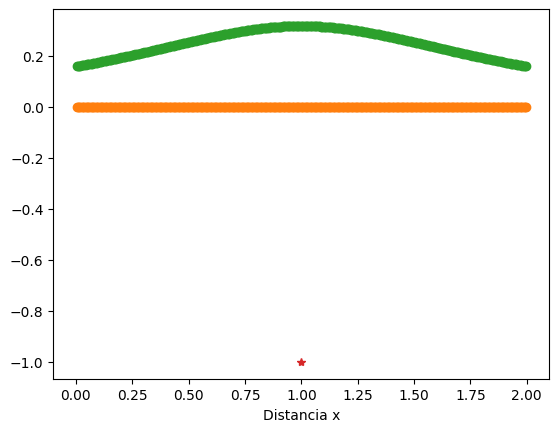

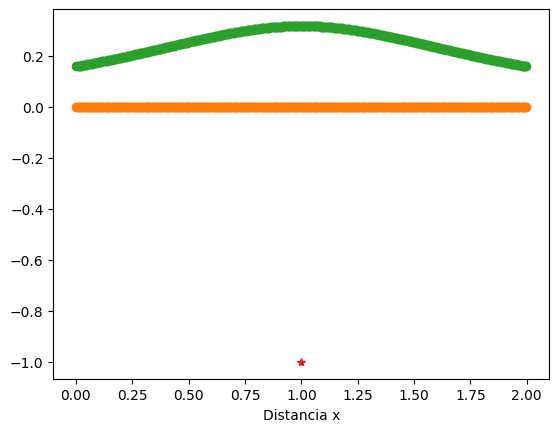

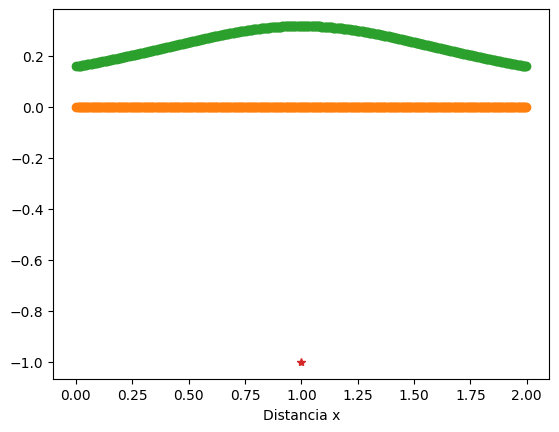

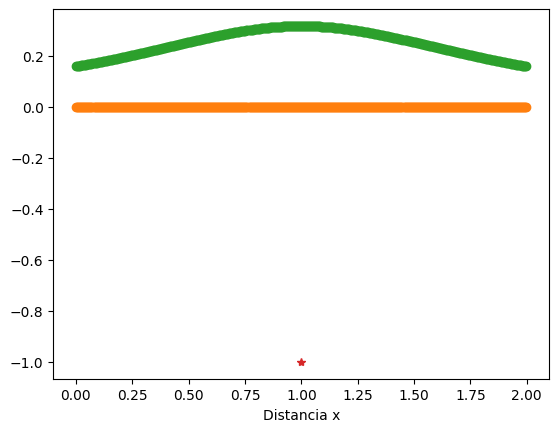

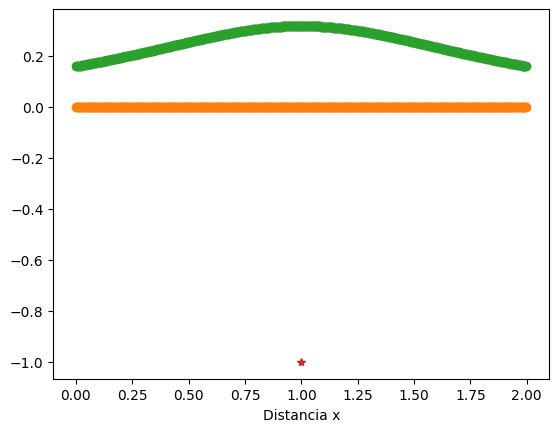

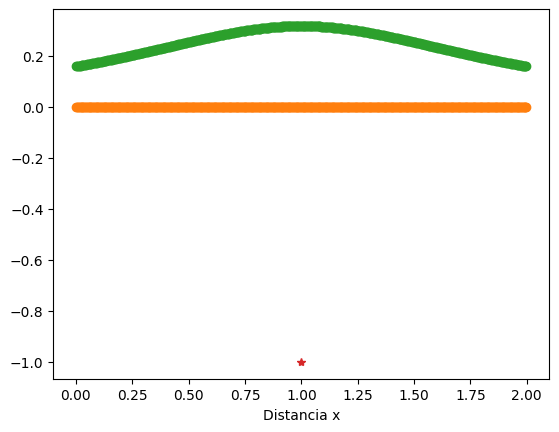

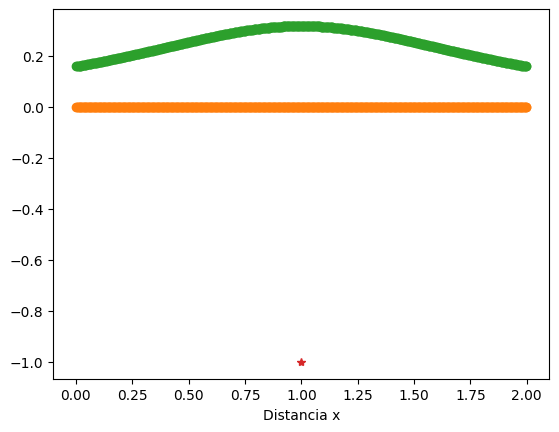

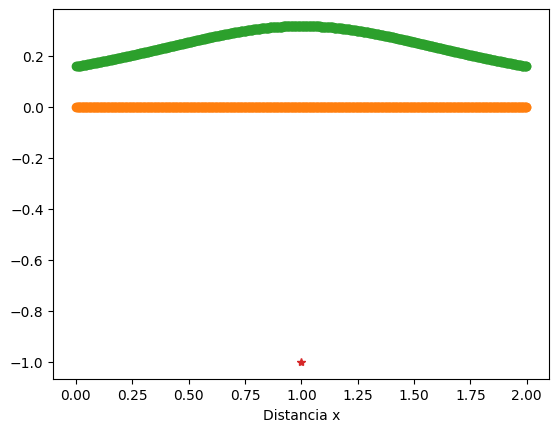

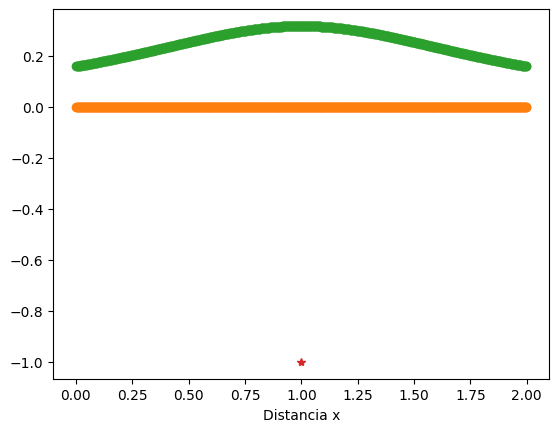

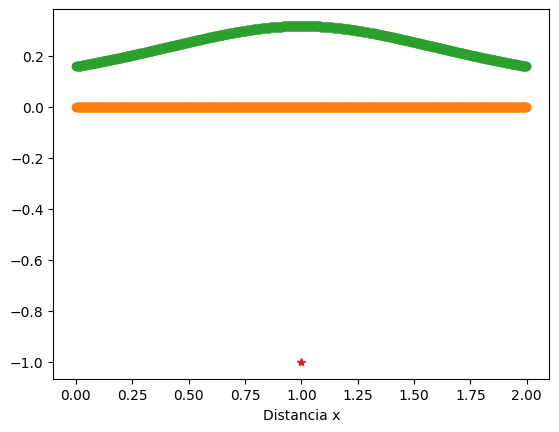

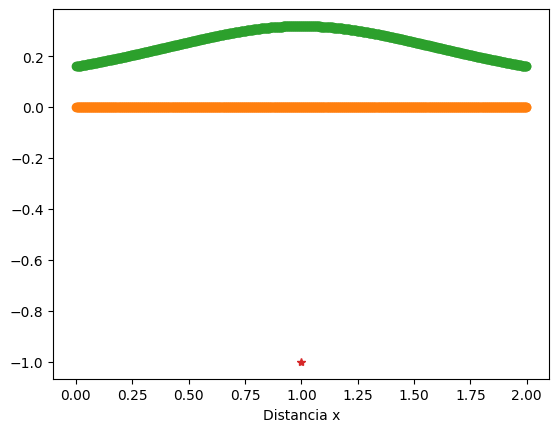

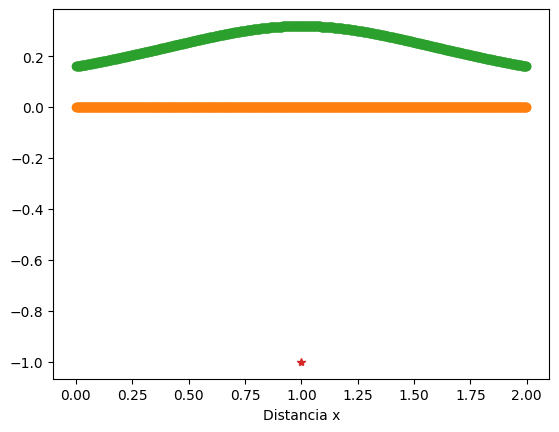

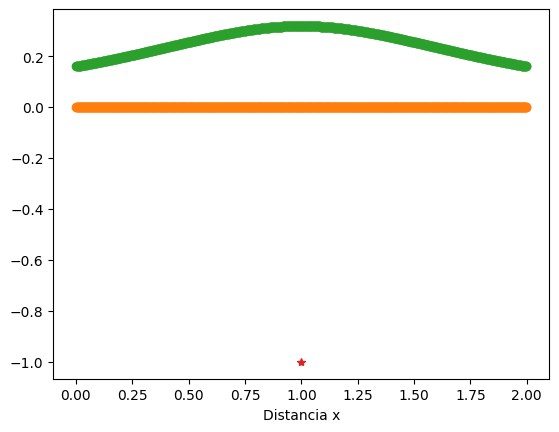

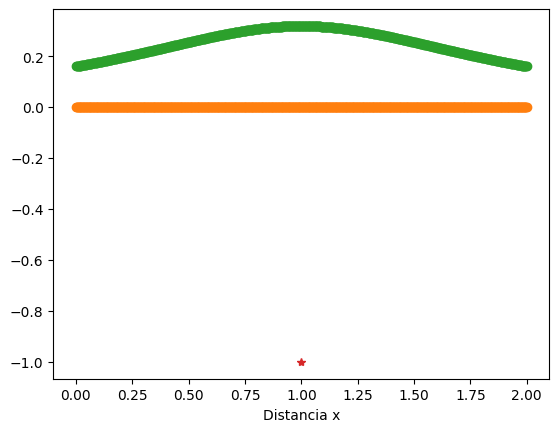

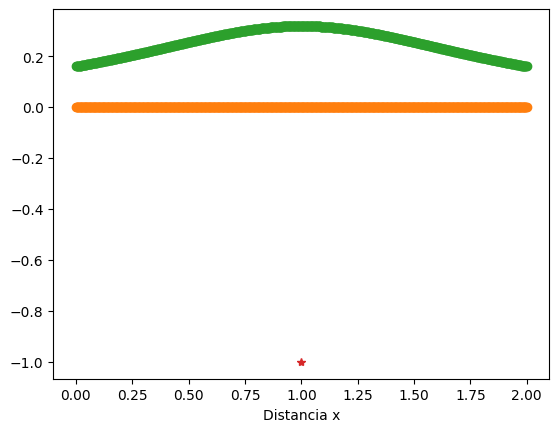

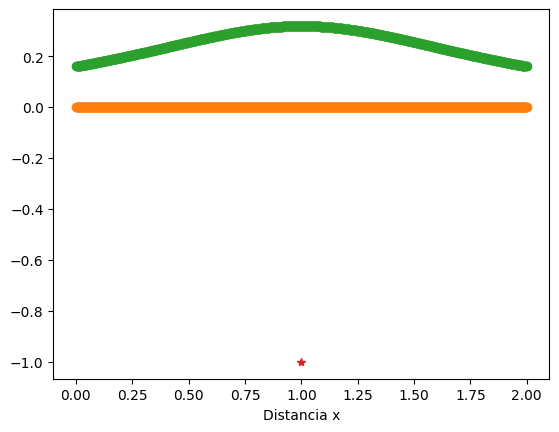

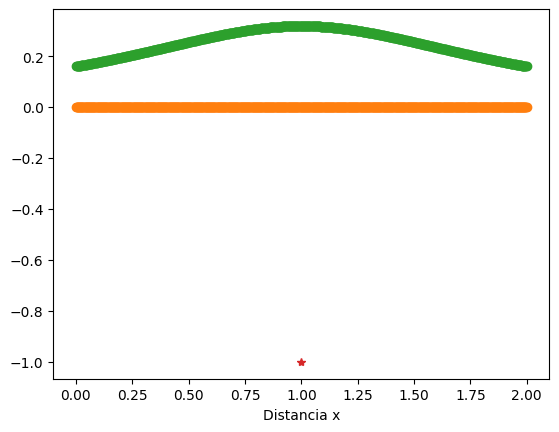

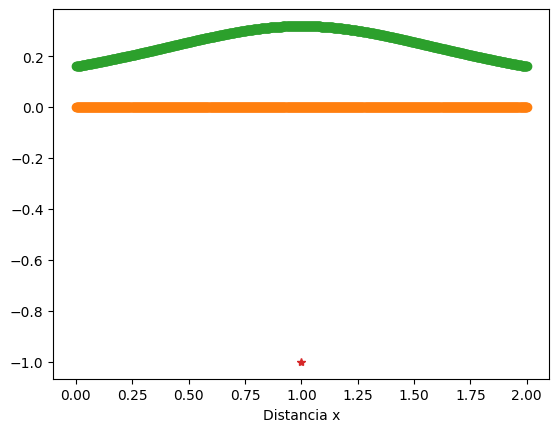

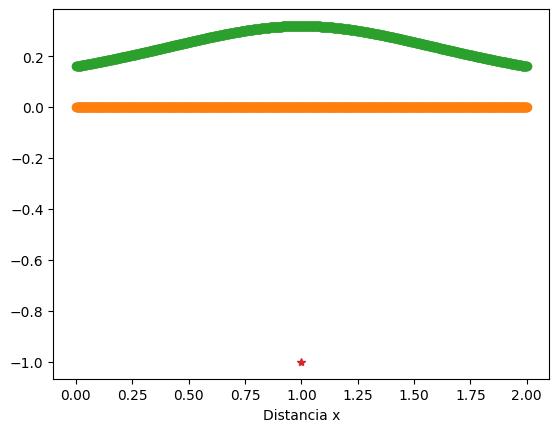

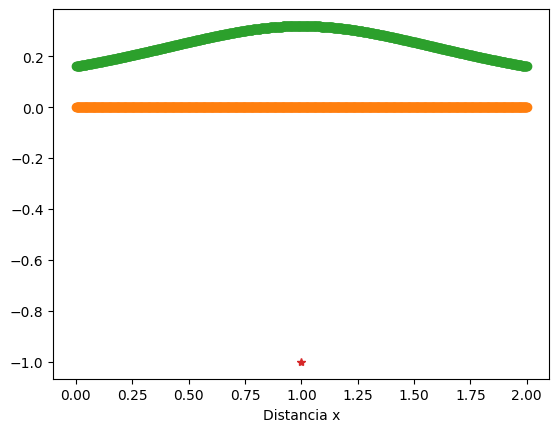

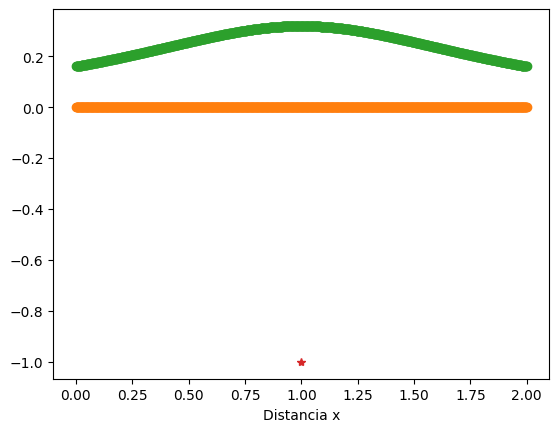

In [28]:
#Graficas para cada frecuencia:

for i in range(len(f)):
  segmento, xp, ns=segmentos(L,dx[i])
  normal=normales(segmento)
  plt.plot(segmento[:,0],segmento[:,1],marker = '|')
  plt.plot(xp[0:int(ns),0],xp[0:int(ns),1],'o')
  plt.plot(xp[0:int(ns),0],np.abs(solucionG[i]),'o')
  plt.plot(1,-1,marker = '*')

  plt.xlabel('Distancia x')

  plt.show()